In [159]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import folium # useful for visualizing data that's been manipulated in Python on an interactive Leaflet map
#import branca.colormap as cm
import seaborn as sns #plotting graphs
import requests #from bs4 import BeautifulSoup
import os 
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

### Loading housing sells dataset for New York City

In [160]:
df_nyc1= pd.read_csv('df_nyc1.csv')
df_nyc1.head()

,Column,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,19/07/2017 00:00
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,0,14/12/2016 00:00
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,0,09/12/2016 00:00
3,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,23/09/2016 00:00
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,17/11/2016 00:00


In [161]:
# understanding columns  in the dataset
df_nyc1.columns.values

array(['Column', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

### Data Exploration and Cleaning

In [162]:
#dropping unnamed column
df_nyc1.drop(['Column'], axis=1, inplace=True)
df_nyc1.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,19/07/2017 00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,0,14/12/2016 00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,0,09/12/2016 00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,23/09/2016 00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,17/11/2016 00:00


In [5]:
# understanding the shape of the data
df_nyc1.shape
#The dataset has 84548 rows and 21 columns

(84548, 21)

In [163]:
#getting summary of numerical data
df_nyc1.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,1.056623e+06
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,1.038794e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [164]:
df_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [7]:
#converting SALE PRICE to type float
df_nyc1['SALE PRICE'].astype('float')

0         6625000.0
1               0.0
2               0.0
3         3936272.0
4         8000000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 84548, dtype: float64

In [8]:
df_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [9]:
#chopping out data for plotting in a graph (taking BOROUGH, ZIP CODE  and sale price data and creating a dataframe with the three columns
df4 = pd.DataFrame(df_nyc1, columns = ['BOROUGH', 'ZIP CODE', 'SALE PRICE'])
df4['ZIP CODE']= list(map(str, df4['ZIP CODE'])) #converting ZIP CODE to string
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BOROUGH     84548 non-null  int64 
 1   ZIP CODE    84548 non-null  object
 2   SALE PRICE  84548 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


#### Lets Rename the boroughs to help our explorers

In [10]:
df4.loc[df4['BOROUGH'] == 1, "BOROUGH"] = "Manhattan"
df4.loc[df4['BOROUGH'] == 2, "BOROUGH"] = "Brooklyn"
df4.loc[df4['BOROUGH'] == 3, "BOROUGH"] = "Queens"
df4.loc[df4['BOROUGH'] == 4, "BOROUGH"] = "Bronx"
df4.loc[df4['BOROUGH'] == 5, "BOROUGH"] = "Staten Island"

In [11]:
df4

,BOROUGH,ZIP CODE,SALE PRICE
0,Manhattan,10009,6625000
1,Manhattan,10009,0
2,Manhattan,10009,0
3,Manhattan,10009,3936272
4,Manhattan,10009,8000000
...,...,...,...
84543,Staten Island,10309,450000
84544,Staten Island,10309,550000
84545,Staten Island,10309,460000
84546,Staten Island,10309,11693337


In [12]:
# removing rows with sale price between 0 to $10,000 as they dont make sense, could be an error in the data entry as this is the sales data of 2012.
df5=df4[df4['SALE PRICE']>10000]


In [13]:
df5_grouped = df5.groupby(['BOROUGH']).mean() #grouping boroughs by average sales price

df5_grouped.to_csv (r'C:/Users/Arshad/Documents/ML/Capstone/df4_grouped.csv') # saving to CSV for future use
df5_grouped

,SALE PRICE
BOROUGH,
Bronx,7.559155e+05
Brooklyn,8.346898e+05
Manhattan,3.375109e+06
Queens,1.316341e+06
Staten Island,5.591714e+05


### visualize the housing sales prices in a bar graph

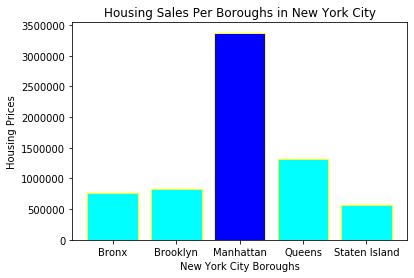

In [14]:
import matplotlib.pyplot as plt
y_pos=df5_grouped.index
height=df5_grouped['SALE PRICE']
plt.bar(y_pos, height, color=['cyan','cyan','b','cyan','cyan'], edgecolor='yellow') #highlights Manhattan
plt.xlabel('New York City Boroughs') # add to x-label to the plot
plt.ylabel('Housing Prices') # add y-label to the plot
plt.title('Housing Sales Per Boroughs in New York City') # add title to the plot
plt.show()


#### RESULTS 1, Manhattan is very expensive to stay, It should have a high standard of living.

### Lets see maximum price for each of the boroughs to help us make better decision

In [15]:
# setting "BOROUGH" as index so that we can use loc method
df5.set_index('BOROUGH', inplace = True)
# excluding values with minu

In [16]:
# setting up function to print numbers in a better format.
def print_commas(number): 
    return ("{:,}".format(number)) 

In [17]:
BonxPrice=df5.loc['Bronx']
print(print_commas(BonxPrice['SALE PRICE'].max()))


257,500,000


In [18]:
BrooklynPrice=df5.loc['Brooklyn']
print(print_commas(BrooklynPrice['SALE PRICE'].max()))


110,000,000


In [19]:
ManhattanPrice=df5.loc['Manhattan']
print(print_commas(ManhattanPrice['SALE PRICE'].max()))


2,210,000,000


In [20]:
QueensPrice=df5.loc['Queens']
print(print_commas(QueensPrice['SALE PRICE'].max()))


345,000,000


In [21]:
StatenIslandPrice=df5.loc['Staten Island']
print(print_commas(StatenIslandPrice['SALE PRICE'].max()))


122,000,000


### Manhattan has the expensive apartments too!
#### Conclusion: Manhattan will be the right borough to our target audience because it is the most expensive borough and must have high standard of living too. This is where people get rich.

In [22]:
df_nyc1['SALE DATE']=pd.to_datetime(df_nyc1['YEAR BUILT'])
#changing SALE DATE to type date

In [23]:
df_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

In [24]:
df_nyc1

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,1970-01-01 00:00:00.000001900
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,0,1970-01-01 00:00:00.000001900
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,0,1970-01-01 00:00:00.000001900
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,1970-01-01 00:00:00.000001913
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,1970-01-01 00:00:00.000001900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400,2575,1998,1,B9,450000,1970-01-01 00:00:00.000001998
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000,1970-01-01 00:00:00.000001998
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000,1970-01-01 00:00:00.000001925
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033,64117,2001,4,K6,11693337,1970-01-01 00:00:00.000002001


In [25]:
#let us remove prices below 10,000 as this could be due to data entry errors(assumption)
df_nyc2=df_nyc1[df_nyc1['SALE PRICE']>10000]


In [26]:
df_nyc2.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,58400.000000,58400.000000,58400.000000,58400.000000,58400.000000,58400.000000,58400.000000,58400.000000,58400.000000,5.840000e+04
mean,2.934760,4136.943459,391.636267,10708.021370,1.707021,0.164229,1.882175,1812.706216,1.629932,1.529690e+06
std,1.329816,3565.035239,670.468538,1246.413791,14.195353,9.934607,17.433206,501.550241,0.697483,1.247003e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000100e+04
25%,2.000000,1271.000000,21.000000,10280.000000,0.000000,0.000000,0.000000,1920.000000,1.000000,3.893202e+05
50%,3.000000,3145.000000,50.000000,11206.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,6.400000e+05
75%,4.000000,6092.000000,1002.000000,11357.000000,1.000000,0.000000,2.000000,1966.000000,2.000000,1.100000e+06
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [27]:
df_nyc2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58400 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         58400 non-null  int64         
 1   NEIGHBORHOOD                    58400 non-null  object        
 2   BUILDING CLASS CATEGORY         58400 non-null  object        
 3   TAX CLASS AT PRESENT            58400 non-null  object        
 4   BLOCK                           58400 non-null  int64         
 5   LOT                             58400 non-null  int64         
 6   EASE-MENT                       58400 non-null  object        
 7   BUILDING CLASS AT PRESENT       58400 non-null  object        
 8   ADDRESS                         58400 non-null  object        
 9   APARTMENT NUMBER                58400 non-null  object        
 10  ZIP CODE                        58400 non-null  int64         
 11  RE

In [28]:
#Let us filter Manhattan houses to explore further
Manhattan_Apartment =df_nyc2.loc[df_nyc2['BOROUGH'] == "Manhattan"]
Manhattan_Apartment

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


### Lets visualize New York city 

In [29]:
#loading New York City map that shows the overview of the city  
NewYork_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10,tiles='OpenStreetMap') # create a  New York map
NewYork_map

In [30]:
newyork_geo= r'new-york-city-boroughs.geojson' # geojson file

In [31]:
df5.rename(columns={'index': 'BOROUGH'},inplace=True)
df5.reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,BOROUGH,ZIP CODE,SALE PRICE
0,Manhattan,10009,6625000
1,Manhattan,10009,3936272
2,Manhattan,10009,8000000
3,Manhattan,10009,3192840
4,Manhattan,10009,16232000
...,...,...,...
58395,Staten Island,10309,450000
58396,Staten Island,10309,550000
58397,Staten Island,10309,460000
58398,Staten Island,10309,11693337


### Gettings Neighbourhood data from Fourthsquare

In [32]:
CLIENT_ID = 'WF504KX1A3Z0324X3XXBDFHO2JFSGDLMDDKIGV1RQZ125FXY' # Foursquare ID
CLIENT_SECRET = '33JYUOCIIFGSDPQXYXCJJF0F3OV2LA2QTTFUUG2E03RB0R3X' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 30 
radius = 500 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WF504KX1A3Z0324X3XXBDFHO2JFSGDLMDDKIGV1RQZ125FXY
CLIENT_SECRET:33JYUOCIIFGSDPQXYXCJJF0F3OV2LA2QTTFUUG2E03RB0R3X


In [33]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data 
nyc = get_new_york_data() #returning a dataframe
nyc.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [34]:
nyc.tail(10)

,Borough,Neighborhood,Latitude,Longitude
296,Brooklyn,Madison,40.609378,-73.948415
297,Bronx,Bronxdale,40.852723,-73.861726
298,Bronx,Allerton,40.865788,-73.859319
299,Bronx,Kingsbridge Heights,40.870392,-73.901523
300,Brooklyn,Erasmus,40.646926,-73.948177
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631
305,Staten Island,Fox Hills,40.617311,-74.081740


In [35]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       306 non-null    object 
 1   Neighborhood  306 non-null    object 
 2   Latitude      306 non-null    float64
 3   Longitude     306 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.7+ KB


In [36]:
#There are 306 entries in the data frame
nyc.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [37]:
#number of neighbourhood per borough
nycplot=nyc.groupby('Borough').count()
nycplot.drop(['Latitude','Longitude'], axis=1, inplace=True)
nycplot
#Manhattan has the least neighbourhood

,Neighborhood
Borough,
Bronx,52
Brooklyn,70
Manhattan,40
Queens,81
Staten Island,63


In [38]:
nycmapdata=nyc.groupby('Borough')['Neighborhood'].count()
nycmapdata

Borough
Bronx            52
Brooklyn         70
Manhattan        40
Queens           81
Staten Island    63
Name: Neighborhood, dtype: int64

In [39]:
nyc

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


In [40]:
# Adding a value column that will contain number of neighbourhood per borough
nyc.loc[nyc['Borough'] == "Bronx", "Value"] = 52
nyc.loc[nyc['Borough'] == "Brooklyn", "Value"] =70
nyc.loc[nyc['Borough'] == "Queens", "Value"] = 81
nyc.loc[nyc['Borough'] == "Staten Island", "Value"] = 63

In [41]:
nyc

,Borough,Neighborhood,Latitude,Longitude,Value
0,Bronx,Wakefield,40.894705,-73.847201,52.0
1,Bronx,Co-op City,40.874294,-73.829939,52.0
2,Bronx,Eastchester,40.887556,-73.827806,52.0
3,Bronx,Fieldston,40.895437,-73.905643,52.0
4,Bronx,Riverdale,40.890834,-73.912585,52.0
...,...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111,40.0
302,Queens,Hammels,40.587338,-73.805530,81.0
303,Queens,Bayswater,40.611322,-73.765968,81.0
304,Queens,Queensbridge,40.756091,-73.945631,81.0


In [42]:
choropleth = folium.Choropleth(
    geo_data=newyork_geo,
    name='choropleth',
    data=nyc,
    columns=['Borough', 'Value'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density',
    highlight=True,
    line_color='black'
).add_to(NewYork_map)

folium.LayerControl(collapsed=True).add_to(NewYork_map)



In [43]:
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)
NewYork_map #display map
#manhattan is less congested!

## Conclusion: Manhattan has less neighbourhood.

In [44]:
df_nyc2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58400 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         58400 non-null  int64         
 1   NEIGHBORHOOD                    58400 non-null  object        
 2   BUILDING CLASS CATEGORY         58400 non-null  object        
 3   TAX CLASS AT PRESENT            58400 non-null  object        
 4   BLOCK                           58400 non-null  int64         
 5   LOT                             58400 non-null  int64         
 6   EASE-MENT                       58400 non-null  object        
 7   BUILDING CLASS AT PRESENT       58400 non-null  object        
 8   ADDRESS                         58400 non-null  object        
 9   APARTMENT NUMBER                58400 non-null  object        
 10  ZIP CODE                        58400 non-null  int64         
 11  RE

In [45]:
df_nyc2.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,1.000000,0.444525,-0.266183,0.293941,-0.015641,0.001285,-0.012210,0.115755,-0.368161,-0.076978
BLOCK,0.444525,1.000000,-0.239911,0.263611,-0.007633,0.001809,-0.005492,0.088229,-0.332652,-0.062426
LOT,-0.266183,-0.239911,1.000000,-0.158853,-0.030236,-0.008560,-0.028626,-0.310551,0.265382,0.009960
ZIP CODE,0.293941,0.263611,-0.158853,1.000000,0.006159,0.002715,0.006602,0.330541,-0.143773,-0.034667
RESIDENTIAL UNITS,-0.015641,-0.007633,-0.030236,0.006159,1.000000,0.013311,0.821761,0.019922,0.000128,0.136136
COMMERCIAL UNITS,0.001285,0.001809,-0.008560,0.002715,0.013311,1.000000,0.580679,0.004214,0.044935,0.046413
TOTAL UNITS,-0.012210,-0.005492,-0.028626,0.006602,0.821761,0.580679,1.000000,0.018224,0.027891,0.137364
YEAR BUILT,0.115755,0.088229,-0.310551,0.330541,0.019922,0.004214,0.018224,1.000000,-0.154443,-0.007294
TAX CLASS AT TIME OF SALE,-0.368161,-0.332652,0.265382,-0.143773,0.000128,0.044935,0.027891,-0.154443,1.000000,0.112824
SALE PRICE,-0.076978,-0.062426,0.009960,-0.034667,0.136136,0.046413,0.137364,-0.007294,0.112824,1.000000


## Predicting Housing Prices in Manhattan

### Now we know our target bourough is Manhattan lets found out how much we can spend buying the house give selected features.

#### Lets us start by loading our datset for Manhattan!

In [46]:
df_Man=pd.read_excel("C:/Users/Arshad/Documents/ML/capstone/newyorkdata/rollingsales_manhattan.xls")
df_Man              

,Manhattan Rolling Sales File. All Sales From August 2019 - July 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales as of 08/12/2020,Unnamed: 20
0,"For sales prior to the Final, Neighborhood Nam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1,0,1,987,2183,1860,1,A4,0,2019-09-25 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,63,NaN,V1,524 FT WASHINGTON AVENUE,NaN,...,0,0,0,4500,0,NaN,4,V1,16900000,2020-02-20 00:00:00
13916,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,64,NaN,V1,N/A WEST 184 STREET,NaN,...,0,0,0,27829,0,NaN,4,V1,16900000,2020-02-20 00:00:00
13917,1,WASHINGTON HEIGHTS UPPER,32 HOSPITAL AND HEALTH FACILITIES,4,2180,125,NaN,I5,4337 BROADWAY,NaN,...,0,2,2,10700,10745,1953,4,I5,11700929,2019-12-31 00:00:00
13918,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1101,NaN,RB,"40 PINEHURST AVENUE, CFA",CFA,...,NaN,1,1,NaN,NaN,2016,4,RB,0,2020-04-29 00:00:00


In [91]:
#let us reloading dataset by skipping the first four rows so that the first row becomes a column name
df_man=pd.read_excel("C:/Users/Arshad/Documents/ML/capstone/newyorkdata/rollingsales_manhattan.xls",
                       sheet_name='Manhattan',
                       skiprows=range(4),
                       skipfooter=0)

In [92]:
df_man.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0,2019-09-25
1,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3.0,0.0,3.0,2381.0,3084.0,1899.0,1,C0,4350000,2020-07-16
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9,NaN,C0,604 EAST 11TH STREET,NaN,...,3.0,0.0,3.0,2375.0,5110.0,1939.0,1,C0,0,2019-10-24
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,372,23,NaN,C1,300 EAST 3RD STREET,NaN,...,12.0,0.0,12.0,2393.0,7989.0,2001.0,2,C1,1950000,2019-08-08
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,NaN,C4,738 EAST 6TH STREET,NaN,...,11.0,0.0,11.0,1750.0,6500.0,1900.0,2,C4,0,2019-09-11
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,376,23,NaN,C3,"262 EAST 7TH STREET, 4",NaN,...,4.0,0.0,4.0,2059.0,4154.0,1900.0,2,C3,600000,2019-12-12
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,376,26,NaN,C3,268 EAST 7TH STREET,NaN,...,4.0,0.0,4.0,2065.0,3491.0,1900.0,2,C3,4350000,2019-10-31
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,28,NaN,C4,272 EAST 7TH STREET,NaN,...,24.0,0.0,24.0,2764.0,13206.0,1900.0,2,C4,1,2020-06-26
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,31,NaN,C4,"278 EAST 7TH STREET, 3C/D",NaN,...,19.0,0.0,19.0,2772.0,13248.0,1920.0,2,C4,2500,2020-02-11
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,31,NaN,C4,"278 EAST 7TH STREET, 6B/6D",NaN,...,19.0,0.0,19.0,2772.0,13248.0,1920.0,2,C4,2500,2020-02-11


In [93]:
# lets caculate the age of building, this will be important later on we predict price.
df_man['Building_Age']= 2020 - df_man['YEAR BUILT']

In [94]:
# checking everything is in order
df_man['Building_Age']

0        160.0
1        121.0
2         81.0
3         19.0
4        120.0
         ...  
13911      NaN
13912      NaN
13913     67.0
13914      4.0
13915      4.0
Name: Building_Age, Length: 13916, dtype: float64

In [95]:
#Understanding data types
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13916 entries, 0 to 13915
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         13916 non-null  int64         
 1   NEIGHBORHOOD                    13916 non-null  object        
 2   BUILDING CLASS CATEGORY         13916 non-null  object        
 3   TAX CLASS AT PRESENT            13911 non-null  object        
 4   BLOCK                           13916 non-null  int64         
 5   LOT                             13916 non-null  int64         
 6   EASE-MENT                       0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       13911 non-null  object        
 8   ADDRESS                         13916 non-null  object        
 9   APARTMENT NUMBER                6489 non-null   object        
 10  ZIP CODE                        13916 non-null  int64         
 11  RE

In [96]:
# let us understand mumerical variables
df_man.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,Building_Age
count,13916.0,13916.000000,13916.000000,0.0,13916.000000,7297.000000,1862.000000,7808.000000,1.351000e+03,1.351000e+03,12430.000000,13916.000000,1.391600e+04,12430.000000
mean,1.0,1109.733329,769.840687,NaN,10029.109011,4.802796,3.922127,5.423796,8.383994e+03,5.880899e+04,1954.913516,2.113179,4.051019e+06,65.086484
std,0.0,525.441184,968.035230,NaN,36.256815,104.405572,18.997578,101.915216,7.551372e+04,2.942475e+05,38.426363,0.519456,2.400223e+07,38.426363
min,1.0,10.000000,1.000000,NaN,10001.000000,0.000000,-16.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,1.000000,0.000000e+00,1.000000
25%,1.0,753.750000,29.000000,NaN,10013.000000,1.000000,0.000000,1.000000,1.859000e+03,4.000000e+03,1922.000000,2.000000,3.150000e+05,33.000000
50%,1.0,1167.500000,1002.000000,NaN,10022.000000,1.000000,1.000000,1.000000,2.509000e+03,8.200000e+03,1956.000000,2.000000,8.400000e+05,64.000000
75%,1.0,1447.000000,1209.000000,NaN,10028.000000,1.000000,1.000000,1.000000,5.023000e+03,2.116050e+04,1987.000000,2.000000,1.925000e+06,98.000000
max,1.0,2250.000000,9116.000000,NaN,10463.000000,8764.000000,259.000000,8812.000000,2.675000e+06,8.942176e+06,2019.000000,4.000000,9.780904e+08,220.000000


In [97]:
df_man.shape

(13916, 22)

In [98]:
df_man.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  5
BLOCK                                 0
LOT                                   0
EASE-MENT                         13916
BUILDING CLASS AT PRESENT             5
ADDRESS                               0
APARTMENT NUMBER                   7427
ZIP CODE                              0
RESIDENTIAL UNITS                  6619
COMMERCIAL UNITS                  12054
TOTAL UNITS                        6108
LAND SQUARE FEET                  12565
GROSS SQUARE FEET                 12565
YEAR BUILT                         1486
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
Building_Age                       1486
dtype: int64

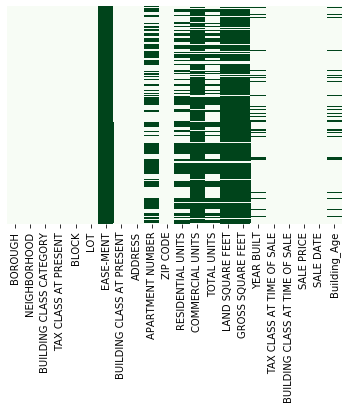

In [99]:
#let us visualize the null values
sns.heatmap(df_man.isnull(), yticklabels=False, cbar=False, cmap="Greens")

In [100]:
# Let us delete cells with lots of missing values as it will be difficult to generate accurate values, also year built since we won't use it
df_man2=df_man.drop(['EASE-MENT', 'YEAR BUILT', 'COMMERCIAL UNITS','RESIDENTIAL UNITS','TOTAL UNITS','APARTMENT NUMBER','LAND SQUARE FEET','GROSS SQUARE FEET'], axis=1, inplace=False)

In [101]:
df_man2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13916 entries, 0 to 13915
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         13916 non-null  int64         
 1   NEIGHBORHOOD                    13916 non-null  object        
 2   BUILDING CLASS CATEGORY         13916 non-null  object        
 3   TAX CLASS AT PRESENT            13911 non-null  object        
 4   BLOCK                           13916 non-null  int64         
 5   LOT                             13916 non-null  int64         
 6   BUILDING CLASS AT PRESENT       13911 non-null  object        
 7   ADDRESS                         13916 non-null  object        
 8   ZIP CODE                        13916 non-null  int64         
 9   TAX CLASS AT TIME OF SALE       13916 non-null  int64         
 10  BUILDING CLASS AT TIME OF SALE  13916 non-null  object        
 11  SA

In [102]:
df_man2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Building_Age
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,A4,189 EAST 7TH STREET,10009,1,A4,0,2019-09-25,160.0
1,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,C0,243 EAST 7TH STREET,10009,1,C0,4350000,2020-07-16,121.0
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9,C0,604 EAST 11TH STREET,10009,1,C0,0,2019-10-24,81.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,372,23,C1,300 EAST 3RD STREET,10009,2,C1,1950000,2019-08-08,19.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,C4,738 EAST 6TH STREET,10009,2,C4,0,2019-09-11,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13911,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,63,V1,524 FT WASHINGTON AVENUE,10033,4,V1,16900000,2020-02-20,NaN
13912,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,64,V1,N/A WEST 184 STREET,10033,4,V1,16900000,2020-02-20,NaN
13913,1,WASHINGTON HEIGHTS UPPER,32 HOSPITAL AND HEALTH FACILITIES,4,2180,125,I5,4337 BROADWAY,10033,4,I5,11700929,2019-12-31,67.0
13914,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1101,RB,"40 PINEHURST AVENUE, CFA",10033,4,RB,0,2020-04-29,4.0


In [103]:
#checking on the status of null values across the dataset

df_man2.isnull().sum()

BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 5
BLOCK                                0
LOT                                  0
BUILDING CLASS AT PRESENT            5
ADDRESS                              0
ZIP CODE                             0
TAX CLASS AT TIME OF SALE            0
BUILDING CLASS AT TIME OF SALE       0
SALE PRICE                           0
SALE DATE                            0
Building_Age                      1486
dtype: int64

In [104]:
#lets fill in missing values, each feature separately
#for mumerical values we use mean
df_man2['Building_Age']=df_man2['Building_Age'].fillna(df_man2['Building_Age'].mean()) 

In [105]:
#for categorical values we use mode
df_man2['TAX CLASS AT PRESENT']=df_man2['TAX CLASS AT PRESENT'].fillna(df_man2['TAX CLASS AT PRESENT'].mode()[0]) 
df_man2['BUILDING CLASS AT PRESENT']=df_man2['BUILDING CLASS AT PRESENT'].fillna(df_man2['BUILDING CLASS AT PRESENT'].mode()[0]) 

In [106]:
#let us see if we have resolved all the null values
df_man2.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
Building_Age                      0
dtype: int64

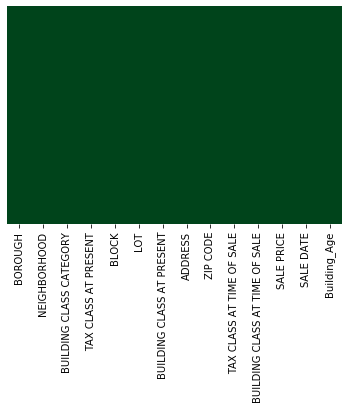

In [107]:
sns.heatmap(df_man2.isnull(), yticklabels=False, cbar=False, cmap="Greens_r")

In [66]:
# no more null values, but if we could have some few remaining we could also opt to delete (df_man2.dropna(inplace=true))

In [108]:
#let us work on the categorical features
df_man2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13916 entries, 0 to 13915
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         13916 non-null  int64         
 1   NEIGHBORHOOD                    13916 non-null  object        
 2   BUILDING CLASS CATEGORY         13916 non-null  object        
 3   TAX CLASS AT PRESENT            13916 non-null  object        
 4   BLOCK                           13916 non-null  int64         
 5   LOT                             13916 non-null  int64         
 6   BUILDING CLASS AT PRESENT       13916 non-null  object        
 7   ADDRESS                         13916 non-null  object        
 8   ZIP CODE                        13916 non-null  int64         
 9   TAX CLASS AT TIME OF SALE       13916 non-null  int64         
 10  BUILDING CLASS AT TIME OF SALE  13916 non-null  object        
 11  SA

In [109]:
address=df_man2['ADDRESS'].value_counts()
address.head(20)

551 MAIN STREET, RES                  7
1335 AVENUE OF THE AMERICAS, TIMES    6
33 WEST 37TH STREET, FLOOR            6
2373 BROADWAY, RSD 1                  5
N/A 1 AVENUE                          4
215 EAST 96TH STREET, CONDP           4
33 WEST 37TH STREET, ANCIL            4
36 WEST 44TH STREET, 600B             3
77 PARK AVENUE, 14D                   3
15 WEST 61ST STREET, 10F              3
11 EAST 26TH STREET                   3
330 EAST 83RD STREET, LC              3
455 MAIN STREET, 5Q                   3
44-48 WEST 18TH STREET                3
322 CENTRAL PARK WEST, 10B            3
15 WEST 61ST STREET, 14A              2
82 UNIVERSITY PLACE, 6A               2
2062 2 AVENUE                         2
510 MANHATTAN AVENUE                  2
222 EAST 82ND STREET, 5H              2
Name: ADDRESS, dtype: int64

In [110]:
address.shape

(13628,)

In [111]:
#dropping address as it is too specific, it has 13628 groups
df_man2=df_man2.drop(['ADDRESS'], axis=1, inplace=False)
df_man2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Building_Age
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,A4,10009,1,A4,0,2019-09-25,160.000000
1,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,C0,10009,1,C0,4350000,2020-07-16,121.000000
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9,C0,10009,1,C0,0,2019-10-24,81.000000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,372,23,C1,10009,2,C1,1950000,2019-08-08,19.000000
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,C4,10009,2,C4,0,2019-09-11,120.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13911,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,63,V1,10033,4,V1,16900000,2020-02-20,65.086484
13912,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,64,V1,10033,4,V1,16900000,2020-02-20,65.086484
13913,1,WASHINGTON HEIGHTS UPPER,32 HOSPITAL AND HEALTH FACILITIES,4,2180,125,I5,10033,4,I5,11700929,2019-12-31,67.000000
13914,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1101,RB,10033,4,RB,0,2020-04-29,4.000000


In [122]:
#Extracting month from Sale date,(does month of sale affect Sale price?)
df_man2['Month']=df_man2['SALE DATE'].dt.month
df_man2.drop(['SALE DATE'],axis=1, inplace=True)
df_man2.info()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Building_Age,Month
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,A4,10009,1,A4,0,160.000000,9
1,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,C0,10009,1,C0,4350000,121.000000,7
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9,C0,10009,1,C0,0,81.000000,10
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,372,23,C1,10009,2,C1,1950000,19.000000,8
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,C4,10009,2,C4,0,120.000000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13911,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,63,V1,10033,4,V1,16900000,65.086484,2
13912,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2180,64,V1,10033,4,V1,16900000,65.086484,2
13913,1,WASHINGTON HEIGHTS UPPER,32 HOSPITAL AND HEALTH FACILITIES,4,2180,125,I5,10033,4,I5,11700929,67.000000,12
13914,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1101,RB,10033,4,RB,0,4.000000,4


In [127]:
# to simplify this let us create a series for the categorical features
categorical=['NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE']
categorical

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'BUILDING CLASS AT TIME OF SALE']

In [128]:
df_man2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13916 entries, 0 to 13915
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         13916 non-null  int64  
 1   NEIGHBORHOOD                    13916 non-null  object 
 2   BUILDING CLASS CATEGORY         13916 non-null  object 
 3   TAX CLASS AT PRESENT            13916 non-null  object 
 4   BLOCK                           13916 non-null  int64  
 5   LOT                             13916 non-null  int64  
 6   BUILDING CLASS AT PRESENT       13916 non-null  object 
 7   ZIP CODE                        13916 non-null  int64  
 8   TAX CLASS AT TIME OF SALE       13916 non-null  int64  
 9   BUILDING CLASS AT TIME OF SALE  13916 non-null  object 
 10  SALE PRICE                      13916 non-null  int64  
 11  Building_Age                    13916 non-null  float64
 12  Month                           

In [129]:
len(categorical)

5

In [130]:
#convert categorical features to numerical values
def category_onehot_multcols(multcolumns):
    df_final=df_man2
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df_man2[fields],drop_first=True)
        
        df_man2.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df_man2,df_final],axis=1)
        
    return df_final

In [131]:
df_man2=category_onehot_multcols(categorical)

NEIGHBORHOOD
BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT
BUILDING CLASS AT PRESENT
BUILDING CLASS AT TIME OF SALE


In [132]:
df_man2.shape

(13916, 293)

In [133]:
df_man3=df_man2.loc[:,~df_man2.columns.duplicated()]

In [134]:
df_man3.shape

(13916, 194)

In [135]:
df_man3.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,TAX CLASS AT TIME OF SALE,SALE PRICE,Building_Age,Month,CHELSEA,CHINATOWN,...,S9,V1,W3,W6,W7,W8,W9,Z5,L9,Z9
0,1,390,61,10009,1,0,160.0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,377,66,10009,1,4350000,121.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,393,9,10009,1,0,81.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,372,23,10009,2,1950000,19.0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,375,28,10009,2,0,120.0,9,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
#Removing rows with "SALE PRICE" less tht 10,000 making an assumption of data entry error
df_man3=df_man3[df_man3['SALE PRICE']>10000]
df_man3

<Figure size 864x720 with 0 Axes>

In [ ]:
#selecting features to be used on the model
#df_man3.corr()
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
#cor = df_man3.corr( )
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [139]:
y=df_man3[['SALE PRICE']]
X=df_man3.drop(['SALE PRICE'],axis='columns')
X

,BOROUGH,BLOCK,LOT,ZIP CODE,TAX CLASS AT TIME OF SALE,Building_Age,Month,CHELSEA,CHINATOWN,CIVIC CENTER,...,S9,V1,W3,W6,W7,W8,W9,Z5,L9,Z9
0,1,390,61,10009,1,160.000000,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,377,66,10009,1,121.000000,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,393,9,10009,1,81.000000,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,372,23,10009,2,19.000000,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,375,28,10009,2,120.000000,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13911,1,2180,63,10033,4,65.086484,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13912,1,2180,64,10033,4,65.086484,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13913,1,2180,125,10033,4,67.000000,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13914,1,2177,1101,10033,4,4.000000,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
y

,SALE PRICE
0,0
1,4350000
2,0
3,1950000
4,0
...,...
13911,16900000
13912,16900000
13913,11700929
13914,0


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [142]:
# Train the model using the training sets
reg = LinearRegression().fit(X_train,y_train)

In [143]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)

In [144]:
#saving results to csv file
pred=pd.DataFrame(y_pred)
pred.to_csv('~/Documents/pred.csv')

In [145]:
# The coefficients
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[-7.54247438e-06 -9.32210655e+02 -2.57560930e+02 -3.08914273e+03
   2.78048412e+06 -7.64324326e+03 -5.93969544e+03  1.83019092e+06
  -4.56719442e+06  2.01217764e+06  1.91948748e+06  2.96889227e+06
  -2.96297374e+06  2.44962448e+07 -1.43707592e+06  1.42573561e+06
   1.44364924e+07  3.60663023e+06  2.54713010e+06  7.48583005e+06
   1.57066583e+06  7.97454313e+05  2.72494816e+06  3.48568187e+06
  -3.54468647e+05  8.43145169e+05  8.22199413e+05  2.41282093e+06
   1.02783051e+07  2.67546060e+06  2.09325647e+06  3.41120915e+06
   1.03841585e+06  2.57563629e+06  3.44575521e+06  1.38819279e+06
   2.87603303e+06  2.97896833e+06  3.41846497e+06  3.76011745e+06
   2.94924637e+06  2.86046012e+06  4.38983734e+06  1.33987519e+06
   2.32533312e+06  9.03613036e+05 -2.53874963e+06 -3.00726211e+05
  -2.21179561e+06  2.74218878e+07 -2.47723013e+06 -5.33612000e+06
  -2.55259806e+06 -4.35547110e+06  2.32455519e+05 -1.84453982e+06
   1.36993937e+06 -3.86965052e+06 -3.35339361e+06  8.1575148

In [148]:
#measuring performance of the model
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient Determination(R2): %.2f' % r2_score(y_test, y_pred))

Mean Squared Error: 324257343274075.25
Coefficient Determination(R2): 0.27


In [149]:
#Exporting my model for future use, also saves training time
import pickle
filename='HousingPrice_LinearModel.pkl'
pickle.dump(reg, open(filename,'wb'))

In [151]:
from sklearn.ensemble import RandomForestRegressori

In [152]:
forest = RandomForestRegressor()
forest=forest.fit(X_train,y_train)
predicted_prices = forest.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [153]:
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, predicted_prices))
print('Coefficient Determination(R2): %.2f' % r2_score(y_test, predicted_prices))

Mean Squared Error: 149312199273471.19
Coefficient Determination(R2): 0.66


## Therefore we shall opt for random forest because it has good R  value which is  0.66 as compared to linear regression with 0.27